***Завдання 1***

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Формування X і y, поділ на train/test
# Якщо файл в цій же папці, цього достатньо:
data = pd.read_csv("breast-cancer.csv")

# Перевіримо перші рядки та розмір
print(data.shape)
data.head()


(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# У цьому датасеті:
# 'id' - ідентифікатор, неінформативний для класифікації
# 'diagnosis' - цільовий клас: 'M' (malignant) / 'B' (benign)

# Видаляємо стовпець 'id'
data = data.drop(columns=["id"])

# Кодуємо цільову змінну:
# M -> 1, B -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Перевіримо, чи немає пропусків
print(data.isna().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [23]:
# Ознаки X — усі стовпчики, крім diagnosis
X = data.drop(columns=['diagnosis'])

# Цільова змінна y — diagnosis
y = data['diagnosis']

# Поділ на тренувальну та тестову вибірки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # щоб зберегти пропорцію класів
)

print("Розмір тренувальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)


Розмір тренувальної вибірки: (455, 30)
Розмір тестової вибірки: (114, 30)


In [24]:
# Масштабування ознак

scaler = StandardScaler()

# Навчаємо scaler на тренувальних даних і трансформуємо їх
X_train_scaled = scaler.fit_transform(X_train)

# До тестових застосовуємо тільки transform (без fit)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Побудова та навчання повнозв’язаної нейронної мережі

# Створюємо модель нейронної мережі
# hidden_layer_sizes=(30, 15) означає:
#   перший прихований шар: 30 нейронів
#   другий прихований шар: 15 нейронів
mlp = MLPClassifier(
    hidden_layer_sizes=(30, 15),
    activation='relu',           # функція активації
    solver='adam',               # оптимізатор
    max_iter=500,                # максимум епох
    random_state=42
)

# Навчання мережі
mlp.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(30, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [35]:
# Оцінка якості моделі
# Прогноз на тестовій вибірці
y_pred = mlp.predict(X_test_scaled)

# Точність
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}")

# Матриця змішування
print("\nМатриця змішування (confusion matrix):")
print(confusion_matrix(y_test, y_pred))

# Розширений звіт
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

Train accuracy: 1.0000
Test accuracy:  0.9649

Матриця змішування (confusion matrix):
[[72  0]
 [ 4 38]]

Classification report:
               precision    recall  f1-score   support

   Benign (0)       0.95      1.00      0.97        72
Malignant (1)       1.00      0.90      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.95      0.96       114
 weighted avg       0.97      0.96      0.96       114



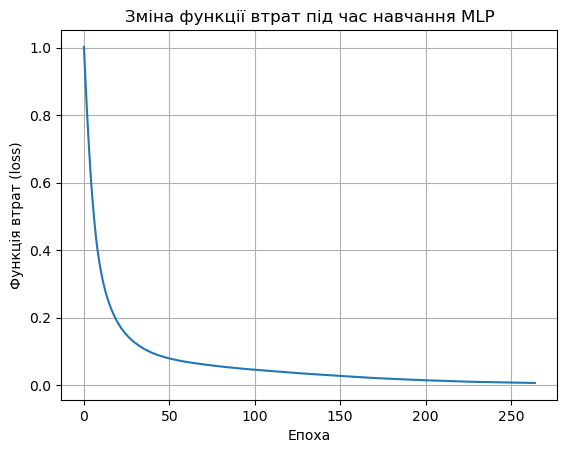

In [37]:
# Виведення кривої втрат

import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.xlabel("Епоха")
plt.ylabel("Функція втрат (loss)")
plt.title("Зміна функції втрат під час навчання MLP")
plt.grid(True)
plt.show()
